Ahmet Alperen Gungor, 28847
Elifnur Ozturk, 28857 
Ayse Sena Acar, 29506
Baris Bakirdoven, 29028

In [ ]:
import random
random.seed(42)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


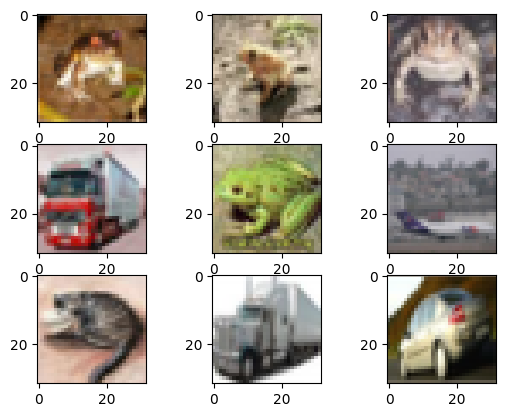

In [ ]:
# example of loading the cifar10 dataset
from matplotlib import pyplot as plt
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i*6000])
# show the figure
plt.show()

In [ ]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

Label: airplane


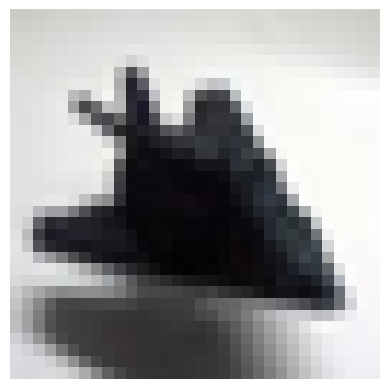

Label: automobile


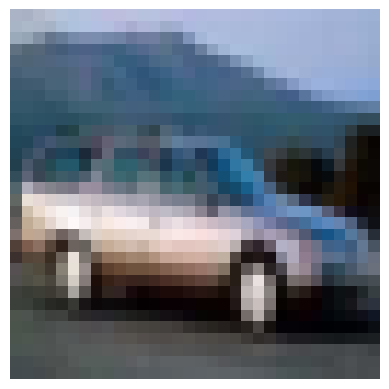

Label: bird


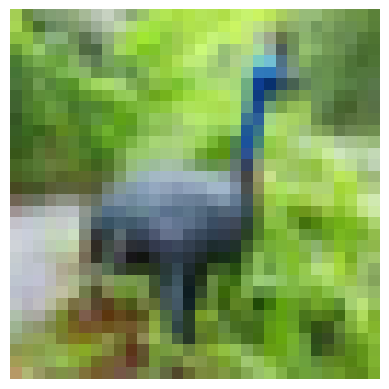

Label: cat


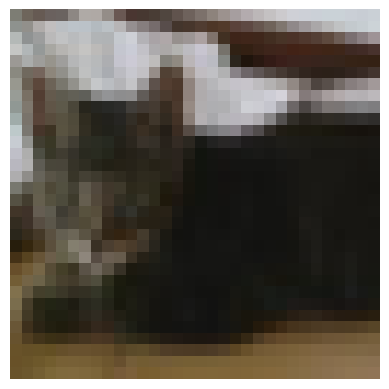

Label: deer


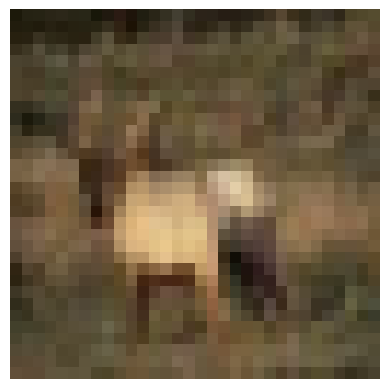

Label: dog


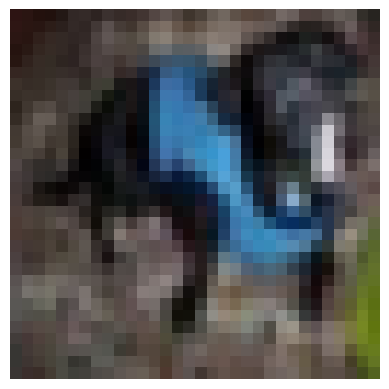

Label: frog


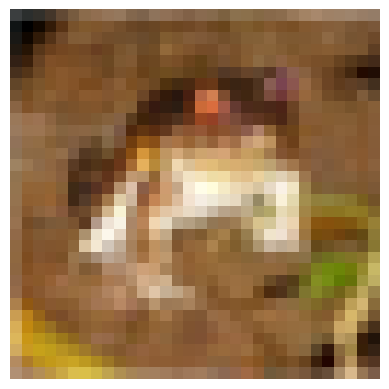

Label: horse


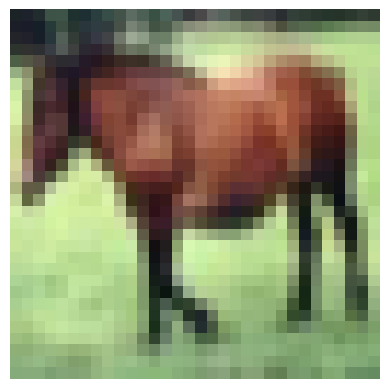

Label: ship


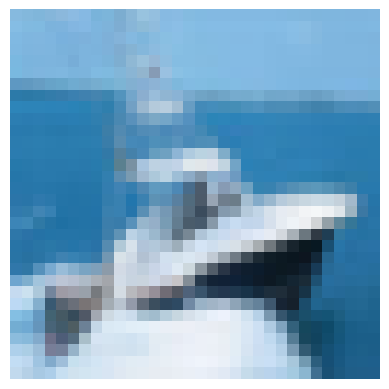

Label: truck


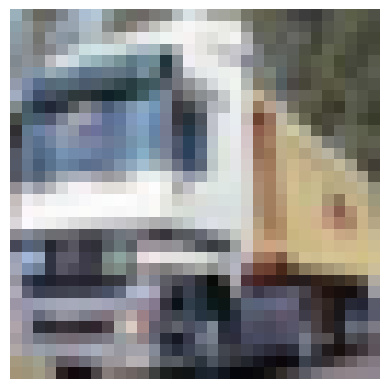

In [ ]:
for i in range(10):
  index = (trainy.flatten() == i).nonzero()[0][0]

  # Get the first cat image and corresponding label
  image = trainX[index]
  label = trainy[index]

  # Print the label of the cat image
  print('Label:', class_labels[label[0]])

  # Display the cat image
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow.keras as K
import tensorflow as tf

In [ ]:
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [ ]:
def preprocess_data(X, Y):
    """
    Pre-processes the data for the model

        :param X: numpy.ndarray of shape (m, 32, 32, 3)
            containing the CIFAR 10 data, where m is the
            number of data points

        :param Y: numpy.ndarray of shape (m,) containing
            the CIFAR 10 labels for X

        :returns: X_p, Y_p
    """
    X_p = K.applications.densenet.preprocess_input(X)

    # encode to one-hot
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p

In [ ]:
from sklearn.model_selection import train_test_split
CALLBACKS = []
MODEL_PATH = 'cifar10.h5'
optimizer = K.optimizers.Adam()

# load cifar 10
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# pre-procces data
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)
x_val, y_val = preprocess_data(x_val, y_val)

# input tensor
inputs = K.Input(shape=(32, 32, 3))

# upscale layer
upscale = K.layers.Lambda(lambda x: tf.image.resize_with_pad(x,
                                                                  160,
                                                                  160,
                                                                  method=tf.image.ResizeMethod.BILINEAR))(inputs)

# load base model
base_model = K.applications.DenseNet121(include_top=False,
                                        weights='imagenet',
                                        input_tensor=upscale,
                                        input_shape=(160,160,3),
                                        pooling='max')



# add top layers
out = base_model.output
out = K.layers.Flatten()(out)
out = K.layers.BatchNormalization()(out)
out = K.layers.Dense(256, activation='relu')(out)
out = K.layers.Dropout(0.3)(out)
out = K.layers.BatchNormalization()(out)
out = K.layers.Dense(128, activation='relu')(out)
out = K.layers.Dropout(0.3)(out)
out = K.layers.BatchNormalization()(out)
out = K.layers.Dense(64, activation='relu')(out)
out = K.layers.Dropout(0.3)(out)
out = K.layers.Dense(10, activation='softmax')(out)

# callbacks
CALLBACKS.append(K.callbacks.ModelCheckpoint(filepath=MODEL_PATH,
                                              monitor='val_accuracy',
                                              save_best_only=True))

CALLBACKS.append(K.callbacks.EarlyStopping(monitor='val_accuracy',
                                            verbose=1,
                                            patience=5))

CALLBACKS.append(K.callbacks.TensorBoard(log_dir='logs'))

# model compile
model = K.models.Model(inputs=inputs, outputs=out)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# train
model.fit(x=x_train,
          y=y_train,
          batch_size=128,
          epochs=20,
          callbacks=CALLBACKS,
          validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot the training accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
313/313 [==============================] - 341s 819ms/step - loss: 0.8526 - accuracy: 0.7254 - val_loss: 0.5977 - val_accuracy: 0.8144
Epoch 2/20
313/313 [==============================] - 246s 785ms/step - loss: 0.3980 - accuracy: 0.8782 - val_loss: 0.6910 - val_accuracy: 0.8005
Epoch 3/20
313/313 [==============================] - 247s 789ms/step - loss: 0.3058 - accuracy: 0.9055 - val_loss: 0.4883 - val_accuracy: 0.8626
Epoch 4/20
313/313 [==============================] - 247s 789ms/step - loss: 0.2525 - accuracy: 0.9228 - val_loss: 0.3866 - val_accuracy: 0.8783
Epoch 5/20
313/313 [==============================] - 245s 784ms/step - loss: 0.2141 - accuracy: 0.9334 - val_loss: 0.7275 - val_accuracy: 0.8054
Epoch 6/20
313/313 [==============================] - 246s 787ms/step - loss: 0.1863 - accuracy: 0.9411 - val_loss: 0.3963 - val_accuracy: 0.8844
Epoch 7/20
313/313 [==============================] - 247s 789ms/step - loss: 0.1571 - accuracy: 0.9512 - val_loss: 0.3677 -

NameError: ignored